# Numercical Aplication and Convergence Study of Spectral Methods

## Abstract

Motivated by the fact that both finite difference methods and finite element methods are based on local representations of functions (usually by lower order polynomials), we want to delve into the spectral methods and attempt to achieve an accuracy that is much higher. Spectral methods make use of global representations (usually by higher order polynomials or Fourier series). When we set the proper conditions for our problems, the result is a degree of accuracy that local methods cannot match. For larger scale computations, especially in multiple space dimensions, this higher accuracy could serve as the foundation for allowing a coarser grid to be used, permitting us to use a smaller number of data points to store and operate upon. For example, spectral methods lead to discrete models with very little artificial dissipation. This is a considerably valuable feature in high Reynolds number fluid flow calculations, where the small amount of physical dissipation can be easily overwhelmed by any kind of numerical dissipation. 

We will first discuss some details of Spectral and Chebychev methods that we discovered outside of class. Next, we focus on other polynomial methods beside the Chebyshev, mainly the Legendre and Jacobi polynomial spectral method. The basic backgrounds and derivations of the polynomial methods will be provided. Then, we implement the Jacobi method on some examples from class and perform convergence studies. Finally, we conclude on our observations and propose futher studies.

## Additional properties of Fourier and Cheyshev methods

###  Comparison between spectral and finite differences

To illustrate the differences between a finite difference method and a spectral method, we compare numerical differentiation of a periodic function u by using a fourth-order finite-difference method and a spectral-collocation method. <br>
Given $h = \frac{2\pi}{N}$ and a uniform grid ${x_0, x_1, ..., x_N}$ with $x_j = jh$, and a set of physical values {u_0, u_1, ..., u_N} with $u_j = u(x_j)$, we choose a fourth-order centered finite difference approximation to $u'(x_j)$ as 
$$
w_j = \frac{u_{j−2} − 8u_{j−1} + 8u_{j+1} − u_{j+2}}{12h}. 
$$
We choose u to be periodic, so $u_{−2} = u_{N−1}, u_{−1} = u_N, u_0 = u_{N+1}$, and $u_1 = u_{N+2}$. Then, the matrix form of the problem is 
$$
\begin{bmatrix}
    w_0 \\ w_1 \\ \vdots \\ \vdots \\ w_{N-1} \\ w_{N}
\end{bmatrix} = 
\frac{1}{12h}
\begin{bmatrix}
    8 & -1 & &  & & 1 & -8\\
    -8 & 8 & -1 & &  & & 1 \\
    1 & -8 & 8 & -1 &  &  \\
    & \ddots & \ddots & \ddots & \ddots\\
    -1 & &  &  & 1 & -8 & 8 \\
    8 & -1 & & & & 1 & -8
\end{bmatrix}
\begin{bmatrix}
    u_0 \\ u_1 \\ \vdots \\ \vdots \\ u_{N-1} \\ u_{N}
\end{bmatrix}
$$
The coefficient matrix is sparse, so finite difference method is local in nature. <br>
Now, the Fourier-collocation approximation of the function $u$ is 
$$
\phi(x) = \sum^{N-1}_{k=0}h_k(x)u_k
$$
where $h_k(x_j) = \delta_{jk}$ and 
$$
h_k(x) = \frac{1}{N} \frac{sin(N(x-x_k)/2)}{sin((x-x_k)/2)} cos((x-x_k)/2). 
$$
Then, the approximation of $u'(x_j)$ is 
$$
w_j = \phi'(x_j) = \sum^{N-1}_{k=0}h_k'(x)u_k
$$
where $j \in[0, N-1]$ and 
$$
u'(x_i) = \left \{ \begin{aligned} 
        &\frac{(-1)^{k+j}}{2} cot[\frac{(j-k)\pi}{N}], \quad & if \quad j\neq k\\
        &0, & if \quad j = k\\
    \end{aligned} \right .
$$
Thus, the coefficient matrix is full in this case, so spectral-collocation method is global in nature. <br> <br>
If we choose an arbitrary example, say $u(x) = ln(2+sinx)$, which is $2\pi$ periodic, and compare the exact derivative $u'(x) = cosx/(2 + sinx)$ with the result from finite difference and the result from Fourier spectral on the same grid, we get $O(h^4)$ convergence of finite difference and $O(e^{-cN})$ for Fourier spectral, where c is a constant, which is much higher than finite difference as it is exponential. <br> <br>
Computationally, the main advantage of a spectral method over a low-order finite element/finite difference method is that the former requires much fewer unknowns to resolve a given problem to a fixed accuracy, leading to potentially significant savings in storage and CPU time. For example, to achieve an engineering precision of 0.01, a spectral method only needs $\pi$ points per wave-length, whereas a low-order method needs roughly 10 points per wave-length. Also, for spectral methods, the derivatives of discrete functions are usually computed exactly. Therefore, spectral methods are usually free of phase errors, a difficulty for long-time integrations of partial differential equations.

## Jacobi polynomial spectral method

The previous section concludes our observations regarding the types of spectral methods we studied in class. For the rest of this project, we will focus on Jacobi polynomials, which is a class of orthogonal polynomials on the interval $[-1,1]$. We will derive the Jacobi polynomials along with its important properties, such as derivatives and zeros. Then we will implement the spectral method derived from Jacobi polynomials on some problems encountered in class to compare results.


#### Introduction: Orthogonal Polynomials

For generic weight function $\omega$ such that $\omega \in L^1$, two functions f and g are orthogonal in $L^2_{\omega}$ (or orthogonal with respect to $\omega$) if <br>
$(f, g)_{\omega} = \int^{b}_a f(x)g(x)\omega(x) dx = 0$. 
A sequence of polynomials $\{p_n\}^{\infty}_{n=0}$ with deg($p_n$) = n is said to be orthogonal in $L^2_ω(a,b)$ if 

$$(p_n, p_m)_{\omega} = \int^{b}_a p_n(x)p_m(x)\omega(x) dx = \gamma_n \delta_{mn}$$ 

where $\gamma_n = ||p_n||^2_{\omega}$ and $\delta_{mn}$ is the Kronecker delta. $P_n$ is the set of all algebraic polynomials of degree $\leq$ n <br>
$p_{n+1}$ is orthogonal to any polynomial $q \in P_n$.  The monic polynomial corresponding to $p_n$ is $\overline{p}_n(x) = p_n(x)/k_n = x^n + a^{(n)}_{n-1}x^{n-1} + ... + a^{(n)}_{0}$ <br>

For any given positive weight function $\omega \in L^1(I)$, there exists a unique sequence of monic orthogonal polynomials {$p^n$} with $deg(p^n) = n$, which can be constructed as 
$$
\overline{p}_0 = 1, \quad \overline{p}_1 = x - \alpha_0 \\
\overline{p}_{n+1} = (x - \alpha_n) \overline{p}_{n} - \beta_n \overline{p}_{n-1}, \quad n \geq 1 \\
where \quad \alpha_n = \frac{(x\overline{p}_n, \overline{p}_n)_{\omega}}{||\overline{p}_n||^2_{\omega}} \quad for \quad n\geq 0 \quad and \quad \beta_n = \frac{||\overline{p}_n||^2_{\omega})_{\omega}}{||\overline{p}_{n-1}||^2_{\omega}} \quad for \quad n\geq 1. 
$$
This general three-term recurrence relation is used to construct orthogonal polynomials. <br>

#### Jacobi polynomial: Some properties

The Jacobi polynomials, denoted by $J_n^{\alpha, \beta}(x)$, are orthogonal with respect to the Jacobi weight function $\omega^{\alpha, \beta} (x) = (1-x)^{\alpha}(1+x)^{\beta}$ over $I = (-1, 1)$. <br>
That is, 
$$\int^{1}_{-1} = J_n^{\alpha, \beta}(x) J_m^{\alpha, \beta}(x) \omega^{\alpha, \beta}(x) dx = \gamma^{\alpha, \beta}_n \delta_{mn}$$ 
where $\gamma^{\alpha, \beta}_n = ||J^{\alpha, \beta}_n||^{2}_{\omega^{\alpha, \beta}}$. <br> 

Let $k^{\alpha, \beta}_{n}$ be the leading coefficient of $J_n^{\alpha, \beta}(x)$. There exists a unique sequence of monic orthogonal polynomials {$J_n^{\alpha, \beta}(x) / k^{\alpha, \beta}_{n}$}. <br>
We define singular Sturm-Liouville operator by 
$$
L_{α,β}u = -(1-x)^{-\alpha}(1+x)^{-\beta}\partial_x ((1-x)^{\alpha+1} (1+x)^{\beta+1} \partial_xu(x)) = (x^2-1) \partial^2_x u(x) + (\alpha - \beta + (\alpha + \beta + 2)x) \partial_x u(x)
$$

The Jacobi polynomials are the eigenfunctions of the singular Sturm-Liouville problem 
$$
L_{α,β} J_n^{\alpha, \beta}(x) = \lambda^{\alpha, \beta}_n J_n^{\alpha, \beta}(x), \quad \lambda^{\alpha, \beta}_n = n(n + \alpha + \beta + 1). 
$$
The differential equation $L_{\alpha, \beta} u = \lambda u$ has a polynomial solution not identically zero if and only if $\lambda$ has the form $n(n + \alpha + \beta + 1)$. This solution is $J_n^{\alpha, \beta}(x)$ up to a constant,  and no solution which is linearly independent of $J_n^{\alpha, \beta}(x)$ can be a polynomial. Also, we have 
$J_n^{\alpha, \beta}(x) = \sum^{n}_{k=0} a^n_k (x-1)^k$ where $\frac{a^{n}_{k+1}}{a^{n}_{k}} = \frac{\gamma_n^{\alpha, \beta}(x) - k(k + \alpha + \beta + 1)}{2(k+1)(k+\alpha +1)}$. <br>
Assume that the Jacobi polynomials are normalized such that $a^n_0 = J_n^{\alpha, \beta}(1) = \binom{n + \alpha}{n}= \frac{\Gamma(n + \alpha + 1)}{n!\Gamma(\alpha +1)}$, 
where $\Gamma(·)$ is the Gamma function $\Gamma(z) = \int_0^{\infty} t^{z-1}e^{-t} dt$.

The leading coefficient is $a^n_n = k^{\alpha, \beta}_{n} = \frac{\Gamma(2n + \alpha + \beta + 1)}{2^nn!\Gamma(n + \alpha + \beta + 1)}$. Then, applying $\frac{a^{n}_{k+1}}{a^{n}_{k}} = \frac{\gamma_n^{\alpha, \beta}(x) - k(k + \alpha + \beta + 1)}{2(k+1)(k+\alpha +1)}$ to {$a^n_k$}, we find
$$
J_n^{\alpha, \beta}(x) = \frac{\Gamma(n + \alpha + 1)}{n!\Gamma(n + \alpha + \beta +1)} \sum^{n}_{k=0} \binom{n}{k} \frac{\Gamma(n + k + \alpha + \beta +1)}{\Gamma(k + \alpha + 1)} (\frac{x-1}{2})^k. 
$$
Also, 
$$
\int^1_{-1} \partial_x J_n^{\alpha, \beta}(x) \partial_x J_m^{\alpha, \beta}(x) \omega^{\alpha+1, \beta+1} dx = \lambda^{\alpha, \beta}_n \gamma^{\alpha, \beta}_n \delta_{nm}. 
$$
Since {$\partial_x J_n^{\alpha, \beta}(x)$} is orthogonal with respect to the weight $\omega^{\alpha+1, \beta+1}$, 
$\partial_x J_n^{\alpha, \beta}(x) = \mu_n^{\alpha, \beta} J_{n-1}^{\alpha+1, \beta+1}(x)$ where 
$\mu_n^{\alpha, \beta} = \frac{nk_n^{\alpha, \beta}}{k_{n-1}^{\alpha+!, \beta+1}} = \frac{1}{2}(n + \alpha + \beta + 1)$. <br>
This gives $\partial_x J_n^{\alpha, \beta}(x) = d^{\alpha, \beta}_{n,k} J_{n-k}^{\alpha+k, \beta+k}(x)$ for $n \geq k$ where
$d^{\alpha, \beta}_{n,k} = \frac{\Gamma(n + k + \alpha + \beta + 1)}{2^k \Gamma(n + \alpha + \beta + 1)}$. <br>


#### Jacobi polynomial: Generating formula

The Jacobi polynomials are generated by the three-term recurrence relation: 
$$
J_{n+1}^{\alpha, \beta}(x) = (a_{n}^{\alpha, \beta}x - b_{n}^{\alpha, \beta}) J_{n}^{\alpha, \beta}(x) - c_{n}^{\alpha, \beta}J_{n-1}^{\alpha, \beta}(x), \quad n \geq 1 \\
J_{0}^{\alpha, \beta}(x) = 1, \quad J_{1}^{\alpha, \beta}(x) = \frac{1}{2}(\alpha + \beta + 2)x + \frac{1}{2}(\alpha - \beta)
$$
where 
$$
a_{n}^{\alpha, \beta} = \frac{(2n + \alpha + \beta + 1)(2n + \alpha + \beta + 2)}{2(n+1)(n + \alpha + \beta + 1)} \\
b_{n}^{\alpha, \beta} = \frac{(\beta^2 - \alpha^2)(2n + \alpha + \beta + 1)}{2(n+1)(n + \alpha + \beta + 1)(2n + \alpha + \beta)} \\
c_{n}^{\alpha, \beta} = \frac{(n + \alpha)(n + \beta)(2n + \alpha + \beta + 2)}{(n+1)(n + \alpha + \beta + 1)(2n + \alpha + \beta)}
$$

The Jacobi polynomials $J_{n}^{\alpha+1, \beta}(x)$ and $J_{n}^{\alpha, \beta+1}(x)$ are linear combinations of $J_{l}^{\alpha, \beta}(x)$: 
$$
J_{n}^{\alpha+1, \beta}(x) = \frac{\Gamma(n+\beta+1)}{\Gamma(n + \alpha + \beta + 2)} \times \sum^{n}_{l=0}\frac{(2l + \alpha + \beta + 1)\Gamma(l + \alpha + \beta + 1)}{\Gamma(l + \beta + 1)} J_{l}^{\alpha, \beta}(x) \\
J_{n}^{\alpha, \beta + 1}(x) = \frac{\Gamma(n+\alpha+1)}{\Gamma(n + \alpha + \beta + 2)} \times \sum^{n}_{l=0}(-1)^{n-1}\frac{(2l + \alpha + \beta + 1)\Gamma(l + \alpha + \beta + 1)}{\Gamma(l + \alpha + 1)} J_{l}^{\alpha, \beta}(x). 
$$
The Jacobi polynomials satisfy 
$$
J_{n}^{\alpha+1, \beta} = \frac{2}{2n + \alpha + \beta + 2} \frac{(n + \alpha + 1)J_{n}^{\alpha, \beta} - (n+1)J_{n+1}^{\alpha, \beta}}{1-x} \\
J_{n}^{\alpha, \beta+1} = \frac{2}{2n + \alpha + \beta + 2} \frac{(n + \beta + 1)J_{n}^{\alpha, \beta} + (n+1)J_{n+1}^{\alpha, \beta}}{1+x}
$$

#### Jacobi polynomial: Jacobi Gauss quadrature

In the Jacobi case, the general quadrature formula reads $\int^1_{-1}p(x)\omega^{\alpha, \beta}(x)dx = \sum^{N}_{j=0}p(x_j)\omega_j + E_N[p]$. <br>
The Jacobi-Gauss quadrature formula is exact for any $p \in P_{2N+1}$ with the Jacobi-Gauss nodes $\{x_j\}^N_{j=0}$ being the zeros of $J_{N+1}^{\alpha, \beta}(x)$ and the corresponding weights are given by <br>
$$
\omega_j = \frac{G_{N}^{\alpha, \beta}}{J_{N}^{\alpha, \beta}(x_j)\partial_x J_{N+1}^{\alpha, \beta}(x_j)} = \frac{\tilde{G}_{N}^{\alpha, \beta}}{(1-x_j^2)[\partial_x J_{N+1}^{\alpha, \beta}(x_j)]^2}
$$
where 
$$
G_{N}^{\alpha, \beta} = \frac{2^{\alpha + \beta}(2N + \alpha + \beta + 2)\Gamma(N + \alpha + 1)\Gamma(N + \beta + 1)}{(N+1)!\Gamma(N + \alpha + \beta + 2)}
$$ 
and 
$$
\tilde{G}_{N}^{\alpha, \beta} = \frac{2^{\alpha + \beta + 1}\Gamma(N + \alpha + 2)\Gamma(N + \beta + 2)}{(N+1)!\Gamma(N + \alpha + \beta + 2)}
$$

#### Jacobi polynomial: Node and weight

The zeros of the  Jacobi polynomial $J_{N+1}^{\alpha, \beta}$ are the eigenvalues of the following symmetric tridiagonal matrix
$$
A_{N+1} = 
\begin{bmatrix}
    a_0 & \sqrt{b_1} & & & \\
    \sqrt{b_1} & a_1 & \sqrt{b_2} & &\\
    & \ddots & \ddots & \ddots &\\
    & \ddots & \ddots & \ddots &\\
    & & \sqrt{b_{N-1}} & a_{N-1} & \sqrt{b_N}\\
    & & & \sqrt{b_{N}} & a_{N}
\end{bmatrix}
$$

where the entries are 
$$
a_j = \frac{\beta^2 - \alpha^2}{(2j + \alpha + \beta)(2j + \alpha + \beta + 2)}, \quad 
b_j = \frac{4j(j+\alpha)(j+\beta)(j+\alpha+\beta)}{(2j + \alpha + \beta - 1)(2j + \alpha + \beta)^2(2j + \alpha + \beta + 1)}. 
$$
The Jacobi-Gauss weights {$\omega_j$}$^{N}_{j=0}$ can be obtained by computing the eigenvectors of $A_{N+1}$. That is 
$\omega_j = \gamma^{\alpha, \beta}_0[Q_0(x_j)]^2 = \frac{2^{\alpha + \beta + 1}\Gamma(\alpha+1)\Gamma(\beta+1)}{\Gamma(\alpha + \beta + 2)}[Q_0(x_j)]^2$, where $Q_0(x_j)$ is the first component of the orthonormal eigenvector corresponding to the eigenvalue $x_j$. <br>

#### Jacobi polynomial: Differentiation in the Physical Space

Let {$x_j$}$^N_{j=0}$ be a set of Jacobi-Gauss-type points, and let {$h_j$}$^N_{j=0}$ be the associated Lagrange basis polynomials. Suppose that $u \in P_N$ is an approximation to the underlying solution and $u(x) = \sum^{N}_{j=0} u(x_j)h_j(x)$. Like before, the differentiation of u can be done through a matrix–vector multiplication $u^{(m)} = D^{m}u$ for $m\geq 1$ where 
$u^{(k)} = (u^{(k)}(x_0), u^{(k)}(x_1), ..., u^{(k)}(x_N))^T$, $u = u^{(0)}$, and the first-order differentiation matrix $D = (d_{kj}=h'_j(x_k))_{k,j = 0,1,...,N}$. So it's enough to compute the entries of the first-order differentiation matrix D using the explicit formula we derived for orthogonal polynomial. <br> 

For Jacobi-Gauss, the quadrature polynomial is $Q(x) = J_{N+1}^{\alpha, \beta}(x)$. And 
$\partial^2_x J_{N+1}^{\alpha, \beta}(x_j) = \frac{1}{1-x^2_j}(\alpha - \beta + (\alpha + \beta + 2)x_j)\partial_x J_{N+1}^{\alpha, \beta}(x_j)$ for $0 \leq j \leq N$. <br>
Following the same procedure, we obtain 
$$
d_{kj} = 
\left \{ \begin{aligned} 
    &\frac{\partial_x J_{N+1}^{\alpha, \beta}(x_k)}{\partial_x J_{N+1}^{\alpha, \beta}(x_j)} \frac{1}{x_k - x_j}, \quad & if \quad 0 \leq k \neq j \leq N,  \\
    &\frac{\alpha - \beta + (\alpha + \beta + 2)x_k}{2(1-x^2_k)}, & if \quad 1 \leq k = j \leq N. 
\end{aligned} \right. \\
$$

## Implementation of Jacobi/Legendre polynomials

In the following section we will attempt to reproduce results from our lecture notes for spectral methods. In other words, instead of Chebyshev polynomials, we will be implementing the Jacobi polynomial spectral method on the same problems with the results we derived previously. 

### Derivations

Recall the generating formula of Jacobi polynomials
$$
J_{n+1}^{\alpha, \beta}(x) = (a_{n}^{\alpha, \beta}x - b_{n}^{\alpha, \beta}) J_{n}^{\alpha, \beta}(x) - c_{n}^{\alpha, \beta}J_{n-1}^{\alpha, \beta}(x), \quad n \geq 1 \\
J_{0}^{\alpha, \beta}(x) = 1, \quad J_{1}^{\alpha, \beta}(x) = \frac{1}{2}(\alpha + \beta + 2)x + \frac{1}{2}(\alpha - \beta)
$$
For simplicity, we will now set $\alpha = \beta = 0$. This is a special case of Jacobi polynomials also known as **Legendre polynomials**. <br>
It is also important to note that Chebyshev polynomials, the spectral method that we used in class, is also a special case of Jacobi, where $\alpha = \beta = -\frac12$
$$
J_{n+1}(x) = (a_{n}x - b_{n}) J_{n}(x) - c_{n}J_{n-1}(x), \quad n \geq 1 \\
J_{0}(x) = 1, \quad J_{1}(x) = x
$$
where 
$$
a_{n}^{\alpha, \beta} = \frac{(2n + \alpha + \beta + 1)(2n + \alpha + \beta + 2)}{2(n+1)(n + \alpha + \beta + 1)} = \frac{(2n + 1)(2n + 2)}{2(n+1)(n+1)} = \frac{2n+1}{n+1}\\
b_{n}^{\alpha, \beta} = \frac{(\beta^2 - \alpha^2)(2n + \alpha + \beta + 1)}{2(n+1)(n + \alpha + \beta + 1)(2n + \alpha + \beta)} = 0 \\
c_{n}^{\alpha, \beta} = \frac{(n + \alpha)(n + \beta)(2n + \alpha + \beta + 2)}{(n+1)(n + \alpha + \beta + 1)(2n + \alpha + \beta)} = \frac{n^2(2n + 2)}{(n+1)(n + 1)2n} = \frac{n}{n+1}
$$
Giving us the explicit formula for generating Legendre polynomials
$$
L_{n}(x) = \frac{2n-1}{n} L_{n-1}(x) - \frac{n-1}{n} L_{n-2}(x), \quad n \geq 2\\
L_{0}(x) = 1, \quad L_{1}(x) = x
$$

Note also that the derivative of Legendre polynomials satisfy

$$
(2n+1)L_n(x)=L'_{n+1}(x)−L'_{n−1}(x), \quad n \geq 1,
$$
$$
    L'_n(x) = \sum_{k=0, k+n \text{ odd}}^{n-1}(2k+1)L_k(x)
$$
We will now consider Legendre-Gauss formulae for the node points and weights of quadrature and the differentiating matrix. Setting $\alpha = \beta = 1$ gives us
$$
d_{kj} = 
\left \{ \begin{aligned} 
    &\frac{L'_{N+1}(x_k)}{L'_{N+1}(x_j)} \frac{1}{x_k - x_j} \quad & if \quad k \neq j  \\
    &\frac{x_k}{1-x^2_k} & if \quad k = j  
\end{aligned} \right. \\
$$
where ${x_j}$ are the $N+1$ zeros of $L_{N+1}(x)$


### Defining functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
# this function f = legendre(n) returns a function 
from scipy.special import roots_legendre
# this function x,w = roots_legendre(n) returns nodes points array x and weights array w

In [2]:
# define Legendre polynomials and derivatives

def Leg(n, x): 

    ''' define Legendre polynomials using recursion
    ### will not be used in the upcoming codes

    :Input:
        - *n* (int) Legendre index as in L_n.
        - *x* (float) evaluation point as in L_n(x)

    :Output:
        - (float) value of L_n(x)
    '''

    if(n == 0):
        return 1 # P0 = 1
    elif(n == 1):
        return x # P1 = x
    else: # recursion
        return (((2 * n)-1)*x * L(n-1, x)-(n-1)*L(n-2, x))/float(n)

def Lp(n, x):
    ''' calculate the derivative of Legendre polynomials

    :Input:
        - *n* (int) Legendre index as in L_n.
        - *x* (float) evaluation point as in L_n(x)

    :Output:
        - (float) value of dxL_n(x)
    '''

    ans = 0
    for k in range(0,n):
        if (k + n) % 2 == 1:
            f = legendre(k)
            ans += (2*k + 1)*f(x)
    return ans


In [3]:
# construct Legendre function similar to cheb(N) in lecture notes

def L(N):
    ''' calculate node points and differentiation matrix

    :Input:
        - *N* (int) Legendre index, such that 
            number of node points = N+1

    :Output:
        - *D* (np.array) differentiation matrix 
            constructed via Gauss quadrature
        - *x* (np.array) array of node points
    '''

    D = np.zeros((N+1, N+1))
    x,w = roots_legendre(N+1)
    for j in range(N+1):
        for k in range(N+1):
            if (k == j):
                D[k,j] = x[k] / (1-x[k]**2)
            else:
                D[k,j] = Lp(N+1, x[k]) / Lp(N+1, x[j]) * 1 / (x[k]-x[j])
    return D, x


With the function `L(N)` defined, We may compare results generated from Legendre polynomials and Chebyshev polynomials. First, we will test the accuracy of the differetiating matrix on a smooth function. 

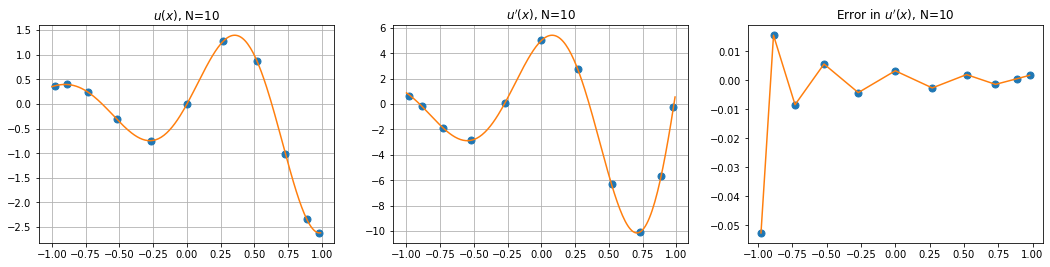

In [4]:
# Test out some differentiation on a smooth function
u = lambda x: np.exp(x) * np.sin(5.0 * x)
u_prime = lambda x: np.exp(x) * (np.sin(5.0 * x) + 5.0 * np.cos(5.0 * x))

x_fine = np.arange(-1, 1, 0.01)
fig, axes = plt.subplots(1, 3)
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight())
N = 10

D, x = L(N)
axes[0].plot(x, u(x), '.', markersize=14)
axes[0].grid(True)
axes[0].plot(x_fine, u(x_fine))
axes[0].set_title('$u(x)$, N=%s' % N)

axes[1].plot(x, np.dot(D, u(x)), '.', markersize=14)
axes[1].grid(True)
axes[1].plot(x_fine, u_prime(x_fine))
axes[1].set_title("$u'(x)$, N=%s" % N)

error = np.dot(D, u(x)) - u_prime(x)
axes[2].plot(x, error, '.', markersize=14)
axes[2].plot(x, error)
axes[2].set_title("Error in $u'(x)$, N=%s" % N)

plt.show()

Now we will try to solve a Poisson problem with non-periodic boundary conditions.  Consider the problem
$$
    u_{xx} = e^{4x},\quad \Omega = [-1, 1], \quad u(\pm 1) = 0
$$
which has the solution
$$
    u(x) = \frac{e^{4x} - x \sinh(4) - \cosh(4)}{16}.
$$

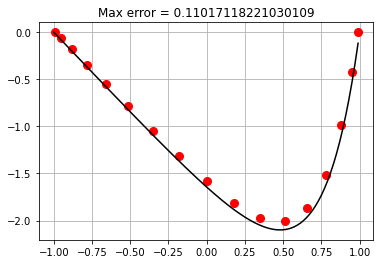

In [5]:
# Adapted from Trefethen program 13
f = lambda x: np.exp(4.0 * x)
u_true = lambda x: (np.exp(4.0 * x) - x * np.sinh(4.0) - np.cosh(4.0)) / 16.0

N = 16
x_fine = np.arange(-1, 1, 0.01)

# Compute square and remove boundaries
D, x = L(N)
D2 = np.dot(D, D)[1:-1, 1:-1]

# Solve problem
U = np.zeros(N + 1)
U[1:-1] = np.linalg.solve(D2, f(x[1:-1]))
error = np.linalg.norm(U - u_true(x), ord=np.infty)

# Plot results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, U, 'r.', markersize=16)
axes.plot(x_fine, u_true(x_fine), 'k')
axes.grid(True)
axes.set_title("Max error = %s" % error)
plt.show()



For Chebyshev polynomials, the error in this example had the magnitude of $e{-11}$, but for the Legendre polynomials we only had $e{-1}$.

### Convergence study

With the same problem as given previously, we will now calculate errors at different values of $N$ and plot convergence. For convenience and feasibility of running the program, we will set $N = 4,8,16,32$.

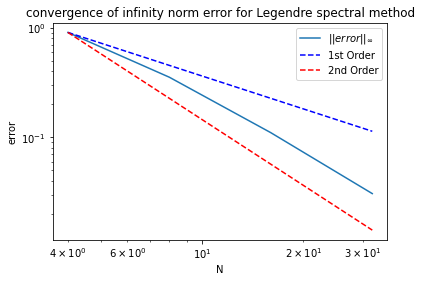

In [6]:
f = lambda x: np.exp(4.0 * x)
u_true = lambda x: (np.exp(4.0 * x) - x * np.sinh(4.0) - np.cosh(4.0)) / 16.0

N_arr = np.array([4,8,16,32])
err_arr = np.zeros(len(N_arr))
x_fine = np.arange(-1, 1, 0.01)

for i in range(len(N_arr)):
    N = N_arr[i]
    # Compute square and remove boundaries
    D, x = L(N)
    D2 = np.dot(D, D)[1:-1, 1:-1]

    # Solve problem
    U = np.zeros(N + 1)
    U[1:-1] = np.linalg.solve(D2, f(x[1:-1]))
    error = np.linalg.norm(U - u_true(x), ord=np.infty)
    err_arr[i] = error

# Plot results
# convergence rate auxilliary line
order_C = lambda delta_x, error, order: np.exp(np.log(error) - order * np.log(delta_x))

fig, axes = plt.subplots(1, 1)
fig.set_figwidth(fig.get_figwidth())
fig.set_figheight(fig.get_figheight())
axes.loglog(N_arr, err_arr, label='$||error||_{\infty}$')
# plot auxilliary lines
axes.loglog(N_arr, order_C(N_arr[0], err_arr[0], -1.0) * N_arr**(-1.0), 'b--', label="1st Order")
axes.loglog(N_arr, order_C(N_arr[0], err_arr[0], -2.0) * N_arr**(-2.0), 'r--', label="2nd Order")
axes.set_xlabel('N')
axes.set_ylabel('error')
axes.set_title('convergence of infinity norm error for Legendre spectral method')
axes.legend()
plt.show()

It can be shown that the method is in fact 2nd order accurate. Note that we originally tried to use the self-defined recursive Legendre function, but switched to the `scipy.special.legendre` function due to algorithmic complexity. However, the derivative of Legendre polynomials is still being calculated recursively, meaning that if we were to calculate error at $N=64$, the program would have taken approximately 40 seconds to run. 

## Implementation of generic Jacobi polynomials

### Derivations

Now we will consider a generic Jacobi polynomial spectral method. Let $\alpha = \beta = 1$ and recall the hypergeometric formula of Jacobi polynomials:
$$
J_n^{\alpha, \beta}(x) = \frac{\Gamma(n + \alpha + 1)}{n!\Gamma(n + \alpha + \beta +1)} \sum^{n}_{k=0} \binom{n}{k} \frac{\Gamma(n + k + \alpha + \beta +1)}{\Gamma(k + \alpha + 1)} (\frac{x-1}{2})^k. 
$$
Recalling that $\partial_x J_n^{\alpha, \beta}(x) = d^{\alpha, \beta}_{n,k} J_{n-k}^{\alpha+k, \beta+k}(x)$ for $n \geq k$ where
$d^{\alpha, \beta}_{n,k} = \frac{\Gamma(n + k + \alpha + \beta + 1)}{2^k \Gamma(n + \alpha + \beta + 1)}$. <br>
This means that the first derivative of Jacobi polynomials is given by
$$
    \frac{d}{dx}J_n^{\alpha, \beta}(x) = \frac{\Gamma(n+\alpha+\beta+2)}{2\Gamma(n+\alpha+\beta+1)} J_{n-1}^{\alpha+1,\beta+1}(x)
$$
As we did with the Legendre polynomials, we will now consider the Jacobi-Gauss quadrature nodes and the corresponding differentiation matrix
$$
d_{kj} = 
\left \{ \begin{aligned} 
    &\frac{\partial_x J_{N+1}^{\alpha, \beta}(x_k)}{\partial_x J_{N+1}^{\alpha, \beta}(x_j)} \frac{1}{x_k - x_j}, \quad & if \quad k \neq j   \\
    &\frac{\alpha - \beta + (\alpha + \beta + 2)x_k}{2(1-x^2_k)}, & if \quad k = j 
\end{aligned} \right. \\
$$
where ${x_j}$ are the zeros of $J_{N+1}^{\alpha,\beta}(x)$


### Defining functions

In [7]:
from scipy.special import gamma
from scipy.special import jacobi
# this function f = jacobi(n, alpha, beta) returns a function 
from scipy.special import roots_jacobi
# this function x,w = roots_jacobi(n, alpha, beta)  returns nodes points array x and weights array w

In [8]:


def jacobi_prime(n,alpha,beta,x):
    ''' calculate the derivative of Jacobi polynomials

    :Input:
        - *n* (int) Jacobi index as in J_n.
        - *alpha, beta* (int) Jacobi parameters
        - *x* (float) evaluation point as in J_n(x)

    :Output:
        - (float) value of dxJ_n(alpha, beta, x)
    '''

    if n == 1:
        return 0
    const = gamma(alpha+beta+n+2)/(2*gamma(alpha+beta+n+1))
    f = jacobi(n-1,alpha+1,beta+1)
    return const*f(x)


In [9]:
# construct Jacobi function. note that alpha, beta can be arbitrary
def J(N,alpha, beta):
    ''' calculate node points and differentiation matrix

    :Input:
        - *N* (int) Jacobi index, such that 
            number of node points = N+1
        - *alpha, beta* (int) Jacobi parameters

    :Output:
        - *D* (np.array) differentiation matrix 
            constructed via Gauss quadrature
        - *x* (np.array) array of node points
    '''

    D = np.zeros((N+1, N+1))
    x,w = roots_jacobi(N+1,alpha,beta)
    for j in range(N+1):
        for k in range(N+1):
            if (k == j):
                D[k,j] = (alpha - beta + (alpha + beta + 2)*x[k]) / (2*(1-x[k]**2))
            else:
                D[k,j] = jacobi_prime(N+1, alpha, beta, x=x[k]) / jacobi_prime(N+1, alpha, beta, x=x[j]) * 1 / (x[k]-x[j])
    return D, x

Testing differentiation accuracy on a smooth function.

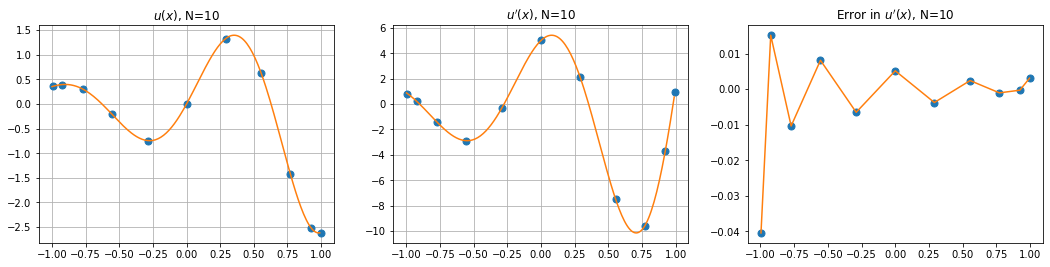

In [10]:
# Test out some differentiation on a smooth function
u = lambda x: np.exp(x) * np.sin(5.0 * x)
u_prime = lambda x: np.exp(x) * (np.sin(5.0 * x) + 5.0 * np.cos(5.0 * x))

x_fine = np.arange(-1, 1, 0.01)
fig, axes = plt.subplots(1, 3)
fig.set_figwidth(fig.get_figwidth() * 3)
fig.set_figheight(fig.get_figheight())
N = 10
# we will take alpha = beta = -0.8 since the error
# is small this way
# Please feel free to change alpha and beta 
D, x = J(N,alpha=-0.8,beta=-0.8)
axes[0].plot(x, u(x), '.', markersize=14)
axes[0].grid(True)
axes[0].plot(x_fine, u(x_fine))
axes[0].set_title('$u(x)$, N=%s' % N)

axes[1].plot(x, np.dot(D, u(x)), '.', markersize=14)
axes[1].grid(True)
axes[1].plot(x_fine, u_prime(x_fine))
axes[1].set_title("$u'(x)$, N=%s" % N)

error = np.dot(D, u(x)) - u_prime(x)
axes[2].plot(x, error, '.', markersize=14)
axes[2].plot(x, error)
axes[2].set_title("Error in $u'(x)$, N=%s" % N)

plt.show()

Since we can choose $\alpha$ and $\beta$ arbitrarily, we might examine the magnitude of errors under different conditions of the parameters. Consider the same Poisson problem that we previously solved with Legendre polynomials.

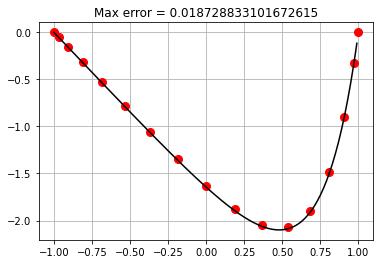

In [11]:
f = lambda x: np.exp(4.0 * x)
u_true = lambda x: (np.exp(4.0 * x) - x * np.sinh(4.0) - np.cosh(4.0)) / 16.0

N = 16
x_fine = np.arange(-1, 1, 0.01)

# Compute square and remove boundaries
D, x = J(N,alpha=-0.8,beta=-0.8)
D2 = np.dot(D, D)[1:-1, 1:-1]

# Solve problem
U = np.zeros(N + 1)
U[1:-1] = np.linalg.solve(D2, f(x[1:-1]))
error = np.linalg.norm(U - u_true(x), ord=np.infty)

# Plot results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, U, 'r.', markersize=16)
axes.plot(x_fine, u_true(x_fine), 'k')
axes.grid(True)
axes.set_title("Max error = %s" % error)
plt.show()



It appears that the larger $\alpha$ and $\beta$ are, the greater the error would be. We have fixed $\alpha$ and $\beta$ at $0.8$ for now to show possibly the best result given that $\alpha$ and $\beta$ must be larger than $-1$. <br>
What is interesting is the fact that when we set the Jacobi polynomials as Chebyshev i.e. $\alpha = \beta = -0.5$, we do not get the small error magnitude as we did in the lecture notes. This is possibly due to the different type of quadrature that we are using.

### Convergence study

With the same problem as given previously, we will now calculate errors at different values of $N$ and plot convergence. For convenience and feasibility of running the program, we will set $N = 4,8,16,32,64$.

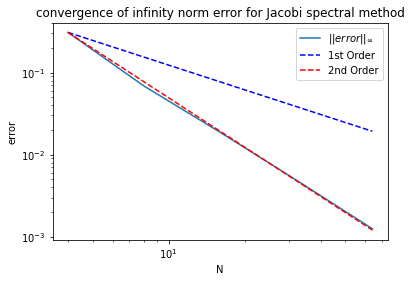

In [12]:
f = lambda x: np.exp(4.0 * x)
u_true = lambda x: (np.exp(4.0 * x) - x * np.sinh(4.0) - np.cosh(4.0)) / 16.0

N_arr = np.array([4,8,16,32,64])
err_arr = np.zeros(len(N_arr))
x_fine = np.arange(-1, 1, 0.01)

for i in range(len(N_arr)):
    N = N_arr[i]
    # Compute square and remove boundaries
    D, x = J(N,alpha=-0.8,beta=-0.8)
    D2 = np.dot(D, D)[1:-1, 1:-1]

    # Solve problem
    U = np.zeros(N + 1)
    U[1:-1] = np.linalg.solve(D2, f(x[1:-1]))
    error = np.linalg.norm(U - u_true(x), ord=np.infty)
    err_arr[i] = error

# Plot results
# convergence rate auxilliary line
order_C = lambda delta_x, error, order: np.exp(np.log(error) - order * np.log(delta_x))

fig, axes = plt.subplots(1, 1)
fig.set_figwidth(fig.get_figwidth())
fig.set_figheight(fig.get_figheight())
axes.loglog(N_arr, err_arr, label='$||error||_{\infty}$')
# plot auxilliary lines
axes.loglog(N_arr, order_C(N_arr[0], err_arr[0], -1.0) * N_arr**(-1.0), 'b--', label="1st Order")
axes.loglog(N_arr, order_C(N_arr[0], err_arr[0], -2.0) * N_arr**(-2.0), 'r--', label="2nd Order")
axes.set_xlabel('N')
axes.set_ylabel('error')
axes.set_title('convergence of infinity norm error for Jacobi spectral method')
axes.legend()
plt.show()



Note that error plot matches exactly the 2nd order convergence line. <br>
Compared to the Legendre polynomial method, the runtime of this convergence study, with the added $N=64$ term, is still rather short. It can be concluded that the definition of the derivative function played a role in the algorithmic complexity of these two methods. Instead of recursively calculating the polynomial derivatives as we did for the Legendre method, the Jacobi derivatives here are given explicitly by calling the `scipy.special.jacobi` function only once.

## Analytical Error Analysis

Although we have shown the Jacobi polynomials achieve 2nd-order error convergence in the infinity norm, there still exists intrinsic error with polynomial methods. In the following section, we will discuss the inverse inequalities for Jacobi polynomials, the orthogonal projection error bound in the Sobolev space, along with the polynomial interpolation error.

### Inverse inequalities for Jacobi polynomials

Since all norms of a function in any finite dimensional space are equivalent, we have
$$
\|\partial_{x} \phi\| \leq C_{N}\|\phi\|, \quad \forall \phi \in P_{N},
$$
This is inverse inequality. The inverse inequalities are very useful for analyzing spectral approximations of nonlinear problems. Here, an important issue is to derive the optimal constant $C_{N}$. Recall that the notation $A \lesssim B$ means that there exists a generic positive constant $c$, independent of $N$ and any function, such that $A \leq c B$. <br>
The first inverse inequality relates two norms weighted with different Jacobi weight functions: 
For $\alpha, \beta>-1$ and any $\phi \in P_{N}$, we have
$$
\|\partial_{x} \phi\|_{\omega^{\alpha+1, \beta+1}} \leq \sqrt{\lambda_{N}^{\alpha, \beta}}\|\phi\|_{\omega^{\alpha, \beta}}, \quad and \quad 
\|\partial_{x}^{m} \phi\|_{\omega^{\alpha+m, \beta+m}} \lesssim N^{m}\|\phi\|_{\omega^{\alpha, \beta}},m \geq 1,
$$
where $\lambda_{N}^{\alpha, \beta}=N(N+\alpha+\beta+1)$. <br>
If the polynomial $\phi$ vanishes at the endpoints $x=\pm 1$, or $\phi \in P_{N}^{0}:=\left\{u \in P_{N}: u(\pm 1)=0\right\}$, we have that, for $\alpha, \beta>-1$ and any $\phi \in P_{N}^{0}$, $\|\partial_{x} \phi\|_{\omega^{\alpha, \beta}} \lesssim N\|\phi\|_{\omega^{\alpha-1, \beta-1}}$. <br>
$\|\partial_{x}^{m} \phi\|_{\omega^{\alpha+m, \beta+m}} \lesssim N^{m}\|\phi\|_{\omega^{\alpha, \beta}},m \geq 1$ is an algebraic analogy to the trigonometric inverse inequality and involves "optimal” constant $C_N = O(N)$. But the norms used in this expression are weighted with different weight functions. For things to make sense, we need to use inverse inequalities involving the same weighted norms. Here, we use an inverse inequality with respect to the Legendre weight function $\omega (x) ≡ 1$: for any $\phi \in P_N$, $||\partial_x \phi|| \leq \frac{1}{2}(N+1)(N+2)||\phi||$. As an extension of this formula, people further derived that, for $\alpha$ and $\beta$ > -1 and any $\phi \in P_N$, $\|\partial_{x}^{} \phi\|_{\omega^{\alpha, \beta}} \lesssim N^{2}\|\phi\|_{\omega^{\alpha, \beta}}$. 


### Orthogonal Projections

From the inverse inequalities of Jacobi polynomials, we can look into a bound for the error of our spectral method approximation.

Here, we will compare the numerical solution $u_N$ with an orthogonal projection $π_Nu$ of the exact solution u in some Sobolev space with Sobolev norm $\|\|_S$. We use the triangle inequality <br> $||u-u_N||_S \leq ||u-\pi_N u||_S + ||\pi_N u - u_N||_S$. So we need to approximate $||u-\pi_N u||_S$ and $||\pi_N u - u_N||_S$. We will use Jacobi polynomials. 
Let $I=(-1,1)$, and let $\omega^{\alpha, \beta}(x)=(1-x)^{\alpha}(1+x)^{\beta}$ with $\alpha, \beta>-1$ be the Jacobi weight function as defined above. For any $u \in L_{\omega \alpha, \beta}^{2}(I)$, we can define 
$$u(x)=\sum_{n=0}^{\infty} \hat{u}_{n}^{\alpha, \beta} J_{n}^{\alpha, \beta}(x) \text { with } \hat{u}_{n}^{\alpha, \beta}=\frac{(u, J_{n}^{\alpha, \beta})_{\omega^{\alpha, \beta}}}{\gamma_{n}^{\alpha, \beta}}$$
where $\gamma_{n}^{\alpha, \beta}=\|J_{n}^{\alpha, \beta}\|_{\omega^{\alpha, \beta}}^{2}$ <br>
We define the $L_{\omega^{\alpha, \beta}}^{2}$ orthogonal projection $\pi_{N}^{\alpha, \beta}: L_{\omega^{\alpha, \beta}}^{2}(I) \rightarrow P_{N}$ such that $(\pi_{N}^{\alpha, \beta} u-u, v)_{\omega^{\alpha, \beta}}=0, \forall v \in P_{N}$, or $(\pi_{N}^{\alpha, \beta} u)(x)=\sum_{n=0}^{N} \hat{u}_{n}^{\alpha, \beta} J_{n}^{\alpha, \beta}(x)$, $\pi_{N}^{\alpha, \beta} u$ is the best polynomial approximation of $u$ in $L_{\omega, \beta}^{2}(I)$. <br>
To measure the truncation error $\pi_{N}^{\alpha, \beta} u-u$, we can define Jacobi-weighted Sobolev space as 
$$B_{\alpha, \beta}^{m}(I):=\{u: \partial_{x}^{k} u \in L_{\omega^{\alpha+k, \beta+k}}^{2}(I), 0 \leq k \leq m\}, m \in \mathbb{N}$$
With the inner product, norm, and semi-norm <br>
$$(u, v)_{B_{\alpha, \beta}^{m}}=\sum_{k=0}^{m}(\partial_{x}^{k} u, \partial_{x}^{k} v)_{\omega^{\alpha+k, \beta+k}}, \|u\|_{B_{\alpha, \beta}^{m}}=(u, u)_{B_{\alpha, \beta}^{m}}^{1 / 2}, |u|_{B_{\alpha, \beta}^{m}}=\|\partial_{x}^{m} u\|_{\omega^{\alpha+m, \beta+m}}$$ 
The space $B_{\alpha, \beta}^{m}(I)$ is different from the usual weighted Sobolev space $H_{\omega}^{m} \beta, \beta$ because it involves different weight functions for derivatives of different orders. And $H_{\omega^{\alpha, \beta}}^{m}(I)$ is a subspace of $B_{\alpha, \beta}^{m}(I)$. So, for any $m \geq 0$ and $\alpha, \beta>-1$, $\|u\|_{B_{\alpha, \beta}^{m}} \leq c\|u\|_{H_{\omega}^{m}{ }_{\alpha, \beta}}$. <br>
Now, from the derivation of Jacobi above, we can derive that 
$$\int_{-1}^{1} \partial_{x}^{k} J_{n}^{\alpha, \beta}(x) \partial_{x}^{k} J_{l}^{\alpha, \beta}(x) \omega^{\alpha+k, \beta+k}(x) d x=h_{n, k}^{\alpha, \beta} \delta_{n l}$$ 
where for $n \geq k$,
$$\begin{aligned}
h_{n, k}^{\alpha, \beta} &=(d_{n, k}^{\alpha, \beta})^{2} \gamma_{n-k}^{\alpha+k, \beta+k} \\
&=\frac{2^{\alpha+\beta+1} \Gamma(n+\alpha+1) \Gamma(n+\beta+1) \Gamma(n+k+\alpha+\beta+1)}{(2 n+\alpha+\beta+1)(n-k) ! \Gamma^{2}(n+\alpha+\beta+1)}.
\end{aligned}$$

If we sum above formula for all $0 \leq k \leq m$, we find that the **Jacobi polynomials are orthogonal in the Sobolev space** $B_{\alpha, \beta}^{m}(I)$. That is, $(J_{n}^{\alpha, \beta}, J_{l}^{\alpha, \beta})_{B_{\alpha, \beta}^{m}}=0, \text { if } n \neq l$ <br>
Thus, we have that, for $\alpha, \beta>-1$. For any $u \in B_{\alpha, \beta}^{m}(I)$,
- if $0 \leq l \leq m \leq N+1$, $\|\partial_{x}^{l}(\pi_{N}^{\alpha, \beta} u-u)\|_{\omega^{\alpha+l, \beta+l}} \leq c\sqrt{\frac{(N-m+1)!}{(N-l+1)!}}(N+m)^{(l-m)/2}\|\partial_{x}^{m} u\|_{\omega^{\alpha+m, \beta+m}}$, 
- if $m>N+1$, $\|\partial_{x}^{l}(\pi_{N}^{\alpha, \beta} u-u)\|_{\omega^{\alpha+l, \beta+l}} \leq c(2 \pi N)^{-1 / 4}(\frac{\sqrt{e / 2}}{N})^{N-l+1}\|\partial_{x}^{N+1} u\|_{\omega^{\alpha+N+1, \beta+N+1}}$ where $c \approx 1$ for $N \gg 1$. <br>
Deriving from the above formula, we have that, with $\alpha, \beta>-1$, if $\partial_{x} u \in B_{\alpha, \beta}^{m-1}(I)$, then for $1 \leq m \leq N+1$, 
$$
\|\pi_{N, \alpha, \beta}^{1} u-u\|_{1, \omega^{\alpha, \beta}} \leq c \sqrt{\frac{(N-m+1) !}{N !}}(N+m)^{(1-m) / 2}\|\partial_{x}^{m} u\|_{\omega^{\alpha+m-1, \beta+m-1}}, 
$$
where $c$ is a positive constant independent of $m, N$ and $u$. <br>
Note that the above estimation is optimal in the $H_{\omega^{\alpha, \beta}}^{1}$-norm, it does not imply an optimal order in the $L_{\omega^{\alpha, \beta} \beta}^{2}$-norm. We can get an optimal estimate in the $L_{\omega^{\alpha, \beta}}^{2}$-norm by using a duality argument, which is also known as the Aubin-Nitsche technique. Assuming the regularity of the solution for an auxiliary problem, we can have a optimal estimate in $L_{\omega^{\alpha, \beta}}^{2}$-norm through the duality argument: <br>
Set $\alpha, \beta>-1$. If $\partial_{x} u \in B_{\alpha, \beta}^{m-1}(I)$, then for $1 \leq m \leq N+1$, 
$$\begin{aligned}
\|\pi_{N, \alpha, \beta}^{1} u-u\|_{\omega^{\alpha, \beta}} \leq c \sqrt{\frac{(N-m+1) !}{N !}}(N+m)^{-(m+1) / 2}\|\partial_{x}^{m} u\|_{\omega^{\alpha+m-1, \beta+m-1}}
\end{aligned}$$
where $c$ is a positive constant independent of $m, N$ and $u$. <br>
This leads to, for $-1<\alpha, \beta<1$, if $u \in H_{0, \omega^{\alpha, \beta}}^{1}(I)$ and $\partial_{x} u \in B_{\alpha, \beta}^{m-1}(I)$, then for $1 \leq m \leq N+1$,
$$\|\hat{\pi}_{N, \alpha, \beta}^{1,0} u-u\|_{1, \omega^{\alpha, \beta}} \leq c \sqrt{\frac{(N-m+1) !}{N !}}(N+m)^{(1-m) / 2}\|\partial_{x}^{m} u\|_{\omega^{\alpha+m-1, \beta+m-1}}$$
where $c$ is a positive constant independent of $m, N$ and $u$. <br>
Also, for $-1<\alpha, \beta<1$, if $u \in H_{0, \omega^{\alpha, \beta}}^{1}(I)$ and $\partial_{x} u \in B_{\alpha, \beta}^{m-1}(I)$, then for $1 \leq m \leq N+1$ and $\mu=0,1$,
$$\left\|u-\pi_{N, \alpha, \beta}^{1,0} u\right\|_{\mu, \omega^{\alpha, \beta}} \leq c \sqrt{\frac{(N-m+1) !}{N !}}(N+m)^{\mu - (m+1) / 2}\|\partial_{x}^{m} u\|_{\omega^{\alpha+m-1, \beta+m-1}}$$ 
where $c$ is a positive constant independent of $m, N$ and $u .$

### Interpolation

Here, we will discuss the polynomial interpolation error on Jacobi-Gauss type points. <br>

For Jacobi-Gauss Interpolation, we have that, for $\alpha, \beta>-1$, $\theta_{j}=\cos ^{-1} x_{j}=\frac{1}{N+1}\{(j+1) \pi+O(1)\}$, with $O(1)$ being uniformly bounded for all values $j=0,1, \ldots, N$, <br> and $\omega_{j} \cong \frac{2^{\alpha+\beta+1} \pi}{N+1}(\sin \frac{\theta_{j}}{2})^{2 \alpha+1}(\cos \frac{\theta_{j}}{2})^{2 \beta+1}, 0 \leq j \leq N$. <br>
The stability of the Jacobi-Gauss interpolation operator $I_{N}^{\alpha, \beta}$ is given by: 
for any $\alpha, \beta>-1$, and any $u \in B_{\alpha, \beta}^{1}(I)$, $\|I_{N}^{\alpha, \beta} u\|_{\omega^{\alpha, \beta}} \lesssim\|u\|_{\omega^{\alpha, \beta}}+N^{-1}\|u^{\prime}\|_{\omega^{\alpha+1, \beta+1}}$. <br>
Thus, for the polynomial space, we have that, for any $\phi \in P_{M}$ and $\psi \in P_{L}$,
$$
\|I_{N}^{\alpha, \beta} \phi\|_{\omega^{\alpha, \beta}} \lesssim (1+\frac{M}{N})\|\phi\|_{\omega^{\alpha, \beta}} \\
|\langle\phi, \psi\rangle_{N, \omega^{\alpha, \beta}}| \lesssim(1+\frac{M}{N})(1+\frac{L}{N})\|\phi\|_{\omega^{\alpha, \beta}}\|\psi\|_{\omega^{\alpha, \beta}}
$$
Then, we can estimate the Jacobi-Gauss interpolation errors that this: <br>
Set $\alpha, \beta>-1$. For any $u \in B_{\alpha, \beta}^{m}(I)$ with $m \geq 1$, we have that for $0 \leq l \leq m \leq N+1$,
$$
\|\partial_{x}^{l}(I_{N}^{\alpha, \beta} u-u)\|_{\omega^{\alpha+l, \beta+l}} \leq c \sqrt{\frac{(N-m+1) !}{N !}}(N+m)^{l-(m+1) / 2}\|\partial_{x}^{m} u\|_{\omega^{\alpha+m, \beta+m}}
$$
where $c$ is a positive constant independent of $m, N$ and $u$. <br>

## Conclusions and future work

So far we have implemented both a generic Jacobi polynomial spectral method and a Legendre method, a special type of Jacobi. It is important to note that we have only used Gauss quadrature for the derivations of the differentiation matrix and node points. There are other types of quadrature available, such as Gauss-Lobatto and Gauss-Ladau. If our results deserve future improvements, we shall try to implement different types of quadrature, specifically for the function that returns $D,x$. 


Our work had also been made easier by the `scipy` package which has offered us useful functions such as `jacobi`, `root_jacobi` and `root_legendre`. In fact, we used the `legendre` function as well in order to replace our self-defined recursive Legendre function. The only difficult part left is calculating the derivatives of these functions for the Gauss quadrature differentiation, where we used recursion for the Legendre method resulting in a high level of algorithmic complexity. Other quadrature methods do not require the definition of a derivative function, and thus could possibly reduce the runtime of the Legendre method.

## References

Barthelmann V, Novak E, Ritter K (2000) High dimensional polynomial interpolation on sparse grids. Advanced Computational Math 12:273–288

Bernardi C, Maday Y (1992b) Polynomial interpolation results in Sobolev spaces. Journal of Computational and Applied Mathematics 43(1-2):53–80

Canuto C, Quarteroni A (1982) Approximation results for orthogonal polynomials in Sobolev spaces. Math Comp 38:67–86

Davis, G (1983) Numerical analysis of spectral methods : theory and applications. Philadelphia : Society for Industrial and Applied Mathematics.

Funaro D (1992) Polynomial Approximations of Differential Equations. Springer-Verlag

Gautschi W (2004) Orthogonal polynomials: computation and approximation. Numerical Mathematics and Scientific Computation, Oxford University Press, New York, oxford Science Publications

Guo B, Wang L (2001) Jacobi interpolation approximations and their applications to singular differential equations. Advances in Computational Mathematics 14:227–276

Guo B, Wang L (2004) Jacobi approximations in non-uniformly Jacobi-weighted Sobolev spaces. J Approx Theory 128(1):1–41

Guo B, Shen J, Wang L (2009) Generalized Jacobi polynomials/functions and their applications. Applied Numerical Math 59(5):1011–1028

Kopriva, D (2009) Implementing Spectral Methods for Partial Differential Equations: Algorithms for Scientists and Engineers. Springer Netherlands. 

Mercier, B (1989) An Introduction to the Numerical Analysis of Spectral Methods. Springer Berlin Heidelberg.

Potts D, Steidl G, Tasche M (1998) Fast algorithms for discrete polynomial transforms. Mathematical Computation 67(224):1577–1590

Ragozin D (1970) Polynomial approximation on compact manifolds and homogeneous spaces. Trans Amer Math Soc 150:41–53

Rawitscher, G (2018) An Introductory Guide to Computational Methods for the Solution of Physics Problems With Emphasis on Spectral Methods. Springer International Publishing

Szego ̈ G (1975) Orthogonal Polynomials (fourth edition), vol 23. AMS Coll. Publ.

Wang L, Shen J (2005) Error analysis for mapped Jacobi spectral methods. J Sci Comput 24(2):183–218